### Определение перспективного тарифа для телеком-компании

Задача:  
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.  

### Описание тарифов:  

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».
В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 


Тариф «Смарт»  
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»  
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

### Описание данных

Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица calls (информация о звонках): 
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях): 
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях): 
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах): 
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Этапы выполнения

* Выгрузка данных
* Предобработка данных:
    * приведенние к нужному типу
    * исправление ошибок и отклонений
* Для каждого пользователя посчитать: 
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя 
* Проанализировать данные:
    * Опишите поведение клиентов оператора, исходя из выборки. 
    * Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
    * Посчитайте среднее количество, дисперсию и стандартное отклонение. 
    * Постройте гистограммы. 
    * Опишите распределения.
* Проверить гипотезы
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
* Вывод

### Подготовка окружения и импорт необходимых библиотек

In [699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math


### Выгрузка данных

In [700]:
df_calls = pd.read_csv('datasets\calls.csv')
df_internet = pd.read_csv('datasets\internet.csv')
df_messages = pd.read_csv('datasets\messages.csv')
df_tariffs = pd.read_csv("datasets/tariffs.csv")
df_users = pd.read_csv('datasets/users.csv')

Ознакомимся с каждой таблицей в отдельности

### df_calls 

In [701]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [702]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [703]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [704]:
df_calls.select_dtypes(include=['object']).describe()

,id,call_date
count,202607,202607
unique,202607,365
top,1000_0,2018-12-31
freq,1,1435


In [705]:
df_calls['user_id'].nunique()

492

In [706]:
print("Дубликатов в датафрейме: ", df_calls.duplicated().sum())
print("Уникальных значений в столбце user_id: ", df_calls.user_id.nunique())

Дубликатов в датафрейме:  0
Уникальных значений в столбце user_id:  492


Из 500 пользователей, имеются всего 492. Проверим, кто отсутствует

In [707]:
df_calls_absent = []

for i in range(1000, 1500): # так как id от 1000 до 1499
    if i not in df_calls['user_id'].unique():
        df_calls_absent.append(i)

print('Отсутствуют:', df_calls_absent)

Отсутствуют: [1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489]


### df_internet

In [708]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Столбец Unnamed: 0 вероятно копирует индекс, можно его удалить.

In [709]:
df_internet = df_internet.drop(columns=['Unnamed: 0'])

In [710]:
df_internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [711]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [712]:
df_internet['user_id'].nunique()

497

Из 500 пользователей, имеются всего 497. Проверим, кто отсутствует

In [713]:
df_internet_absent = []

for i in range(1000, 1500): # так как id от 1000 до 1499
    if i not in df_internet['user_id'].unique():
        df_internet_absent.append(i)

print('Отсутствуют:', df_internet_absent)

Отсутствуют: [1128, 1273, 1371]


In [714]:
print("Дубликатов в датафрейме: ", df_internet.duplicated().sum())
print("Уникальных значений в столбце user_id: ", df_internet.user_id.nunique())

Дубликатов в датафрейме:  0
Уникальных значений в столбце user_id:  497


### df_messages

In [715]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [716]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [717]:
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [718]:
print("Дубликатов в датафрейме: ", df_messages.duplicated().sum())
print("Уникальных значений в столбце user_id: ", df_messages.user_id.nunique())

Дубликатов в датафрейме:  0
Уникальных значений в столбце user_id:  426


In [719]:
df_messages_absent = []

for i in range(1000, 1500): # так как id от 1000 до 1499
    if i not in df_messages['user_id'].unique():
        df_messages_absent.append(i)

print(f'Отсутствуют: {len(df_messages_absent)} значения')

Отсутствуют: 74 значения


### df_tariffs

In [720]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### df_users

In [721]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [722]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


По столбцу churn_date (дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)) можно сделать вывод, что 38 пользователей уже не являются на момент выгрузки пользователями тарифов

In [723]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [724]:
print("Дубликатов в датафрейме: ", df_users.duplicated().sum())
print("Уникальных значений в столбце user_id: ", df_users.user_id.nunique())

Дубликатов в датафрейме:  0
Уникальных значений в столбце user_id:  500


Посмотрим на пересечения списков df_calls_absent, df_messages_absent, df_internet_absent. Есть ли пользователи, которые вовсе не пользовались услугами оператора за текущий период?

In [725]:
total_abscent = set(df_calls_absent)&set(df_internet_absent)&set(df_messages_absent)
print(f'Для абонентов под номерами {total_abscent} отсутсвует информация по использованным услугам.')

Для абонентов под номерами {1128, 1371} отсутсвует информация по использованным услугам.


Заключение:  

5 таблиц, в 4 из них есть пропущенные данные:  
* df_calls - информация о звонках:
    * Данные присутствуют только для 492 пользователей из 500. Информация по абонентам под номерами [1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489] отсутствует.
* df_messages - информация о сообщениях:
    * Данные о собщениях представлены только для 426 пользователей из 500. Номера отсутсвующих пользователей хранятся в списке df_messages_absent
* df_internet - информация об интернет-сессиях:
    * Столбец Unnamed: 0 дублирует индекс. Его можно удалить.
    * Данные присутствуют для 497 пользователей. Информация отсутсвует для пользователей: [1128, 1273, 1371]
* df_users - информация о пользователях:
    * В датафрейме содержится 38 клиентов, которые к моменту выгрузки данных перестали быть пользователями указанных тарифов.

Для абонентов под номерами [1128, 1371] полностью отсутсвует информация по использованным услугам.

### Предобработка данных

### df_users

In [726]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Столбец ref_date преобразуем в формат datetime. Столбец age, city, tariff проверим на аномалии

In [727]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

In [728]:
df_users['city'].value_counts()

city
Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Name: count, Length: 76, dtype: int64

In [729]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [730]:
df_users['tariff'].value_counts()

tariff
smart    351
ultra    149
Name: count, dtype: int64

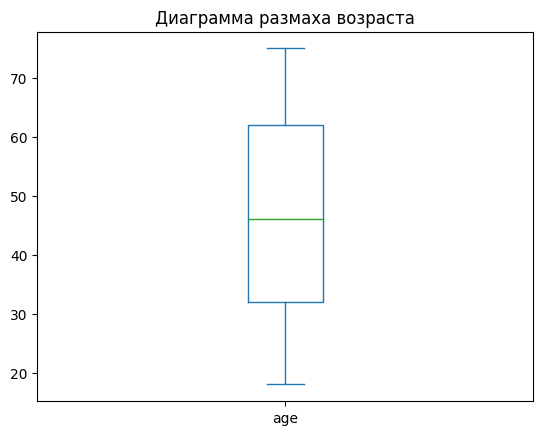

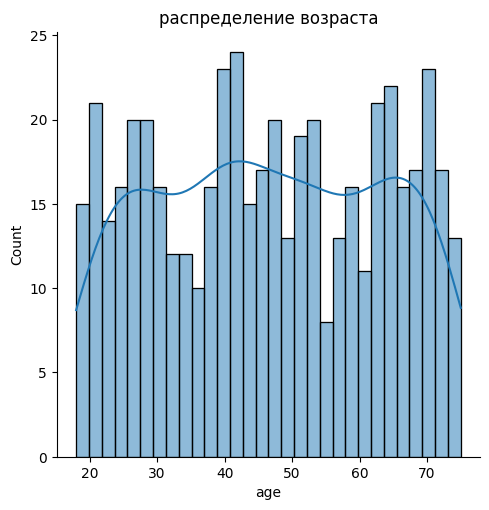

In [731]:
df_users['age'].plot( kind='box')
plt.title('Диаграмма размаха возраста')
sns.displot(df_users['age'], bins=30, kde=True)
plt.title('распределение возраста')
plt.show()

In [732]:
df_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [733]:
df_users['month_users'] = df_users['reg_date'].dt.month
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_users
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


Аномалий ни в одном из столбцов не наблюдается. Можно заметить, что в данных присутсвуют пользователи от 18 до 75 лет.
Средний возраст пользователя составляет 46 лет. Возможно, это связано с тем, что с точки зрения возраста клиентов, у оператора есть примерно 4 основных целевых аудитории. Судя по гистограмме, каждая из них представлена в достаточной степени.

### df_calls

In [734]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Добавим столбец full_duration, в который сохраним длительность разговора в минутах, округленную в большую сторону (в соответсвиии с условиями тарифа)

In [735]:
df_calls['full_duration'] = df_calls['duration'].apply(math.ceil)

In [736]:
df_calls.describe()

,duration,user_id,full_duration
count,202607.000000,202607.000000,202607.000000
mean,6.755887,1253.940619,7.158198
std,5.843365,144.722751,5.959173
min,0.000000,1000.000000,0.000000
25%,1.300000,1126.000000,2.000000
50%,6.000000,1260.000000,6.000000
75%,10.700000,1379.000000,11.000000
max,38.000000,1499.000000,38.000000


In [737]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [738]:
df_calls['month_calls'] = df_calls['call_date'].dt.month
df_calls.head()

,id,call_date,duration,user_id,full_duration,month_calls
0,1000_0,2018-07-25,0.00,1000,0,7
1,1000_1,2018-08-17,0.00,1000,0,8
2,1000_2,2018-06-11,2.85,1000,3,6
3,1000_3,2018-09-21,13.80,1000,14,9
4,1000_4,2018-12-15,5.18,1000,6,12


### df_messages 

In [739]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [740]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [741]:
df_messages['month_messages'] = df_messages['message_date'].dt.month

In [742]:
df_messages.head()

,id,message_date,user_id,month_messages
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


### df_internet 

In [743]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [744]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [745]:
df_internet['month_internet'] = df_internet['session_date'].dt.month

In [746]:
df_internet.head()

,id,mb_used,session_date,user_id,month_internet
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Заключение:  

На данном этапе мы изучили по порядку каждую из таблиц. В каждой таблице мы:  
* Изучили данные, которые она в себе содержит
* Привели данные к соответсвующим типам.
* Проверели данные на предмет аномальных значений и ошибок, а также обработали их необходимым образом.
* Добавили новые столбцы, которые могут пригодиться нам в дальнейшем анализе там, где это было необходимо.

### Расчет метрик. Для каждого пользователя посчитать: 
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Создадим таблицу с количеством сделанных звонков и израсходованных минут разговора по месяцам

Создадим таблицу, в котором сохраним значения "id пользователя - тарифный план", чтобы мы могли присоединять его к нужным таблицам. В качестве индекса, используем столбец user_id

In [747]:
users_id_table = pd.DataFrame(df_users['user_id']).join(df_users['tariff']).set_index('user_id')
users_id_table.head()

,tariff
user_id,
1000,ultra
1001,smart
1002,smart
1003,ultra
1004,ultra


Создадим сводную таблицу, в которой сохраним количество израсходованных минут каждого пользователя по месяцам. Присоеденим к созданной таблице тарифы для каждого пользователя.

In [748]:
calls_duration_month = df_calls.pivot_table(index='user_id', columns='month_calls', values='full_duration', aggfunc='sum').join(users_id_table)
calls_duration_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0,smart
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0,ultra
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,ultra


Создадим таблицу, в которой сохраним количество ненулевых звонков каждого пользователя за месяц. Так как нулевые по условию считаются пропущенными

In [749]:
calls_number_month = df_calls.query('full_duration>0').pivot_table(index='user_id', columns='month_calls', values='full_duration', aggfunc='count').join(users_id_table)
calls_number_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,17.0,28.0,41.0,42.0,46.0,44.0,37.0,38.0,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,47.0,smart
1002,NaN,NaN,NaN,NaN,NaN,14.0,21.0,37.0,25.0,24.0,25.0,27.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,105.0,97.0,95.0,88.0,ultra
1004,NaN,NaN,NaN,NaN,7.0,25.0,20.0,18.0,18.0,21.0,15.0,15.0,ultra


Создадим таблицу, в которой сохраним количество сообщений, отправленных каждым пользователем по месяцам.

In [750]:
messages_number_month = df_messages.pivot_table(index='user_id', columns='month_messages', values='id', aggfunc='count').join(users_id_table)
messages_number_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,ultra
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,ultra
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,smart


Создадим таблицу с объемом интернет-траффика, который пользователи тратили по месяцам

In [751]:
df_internet

,id,mb_used,session_date,user_id,month_internet
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [752]:
internet_number_month = df_internet.pivot_table(index='user_id', columns='month_internet', values='mb_used', aggfunc='sum').join(users_id_table)
internet_number_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66,smart
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53,ultra
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04,ultra


Изучим помесячную выручку с каждого пользователя

### Звонки

Вначале, мы рассчитаем выручку по отдельности за звонки, сообщения и мобильный траффик. Затем сложим получившиеся значения.

In [753]:
df_tariffs.index = df_tariffs['tariff_name'].to_list()

In [754]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
smart,50,15360,500,550,200,3,3,smart
ultra,1000,30720,3000,1950,150,1,1,ultra


In [755]:
calls_duration_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0,smart
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0,ultra
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,ultra


Создадим функцию, которая будет возвращать 0, если значение, переданное в нее меньше или равно нулю

In [756]:
def return_0(value):
    if value <=0:
        return 0
    else:
        return value

Создадим пустой датафрей df_calls_revenue, в который в дальнейшем сохраним значение выручки по каждому клиенту.

In [757]:
df_calls_revenue = pd.DataFrame()

Создадим цикл, в котором рассчитаем выручку по каждому пользователю за переплаченные минуты и заполним датафрейм соответствующими значениями.

In [758]:
for tariff, data in calls_duration_month.groupby('tariff'):
    for month in data.columns[:12]:
        for user_id in data.index:
            # благодаря циклу мы зашли в каждый месяц датафрейма звонков и пробегаемся по каждому пользователю в этом месяце по определенному тарифу
            # найдем минуты сверх лимита по следующей формуле: израсходованные минуты - лимит минут по тарифу
            minute = data.loc[user_id, month] - df_tariffs.loc[tariff, 'minutes_included']
            # Если остаток меньше или равен 0 -> возвращаем 0
            overmin = return_0(minute)
            # сумма к оплате сверх лимита
            total_pay = overmin * df_tariffs.loc[tariff, 'rub_per_minute'] 
            df_calls_revenue.loc[user_id, month] = total_pay
df_calls_revenue = df_calls_revenue.sort_index(axis=1).sort_index()
df_calls_revenue.head()

,1,2,3,4,5,6,7,8,9,10,11,12
1000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1002,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Сообщения

In [759]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
smart,50,15360,500,550,200,3,3,smart
ultra,1000,30720,3000,1950,150,1,1,ultra


In [760]:
messages_number_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,ultra
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,ultra
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,smart


Создадим пустой датафрейм df_messages_revenue. Созраним в него сумму, которые абоненты заплатили за отправленные сверх лимита сообщения.

In [761]:
df_messages_revenue = pd.DataFrame()

In [762]:
for tariff, data in messages_number_month.groupby('tariff'):
    for month in data.columns[:12]:
        for user_id in data.index:
            # благодаря циклу мы зашли в каждый месяц датафрейма звонков и пробегаемся по каждому пользователю в этом месяце по определенному тарифу
            # найдем минуты сверх лимита по следующей формуле: израсходованные минуты - лимит минут по тарифу
            messages = data.loc[user_id, month] - df_tariffs.loc[tariff, 'messages_included']
            # Если остаток меньше или равен 0 -> возвращаем 0
            overmes = return_0(messages)
            # сумма к оплате сверх лимита
            total_pay_mes = overmes * df_tariffs.loc[tariff, 'rub_per_message'] 
            df_messages_revenue.loc[user_id, month] = total_pay_mes
df_messages_revenue = df_messages_revenue.sort_index(axis=1).sort_index()
df_messages_revenue.head()

,1,2,3,4,5,6,7,8,9,10,11,12
1000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0


### Интернет

In [763]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
smart,50,15360,500,550,200,3,3,smart
ultra,1000,30720,3000,1950,150,1,1,ultra


In [764]:
internet_number_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66,smart
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53,ultra
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04,ultra


Создадим пустой датафрейм df_internet_revenue. Сохраним в него сумму, которые абоненты заплатили за использованный сверх лимита интернет-траффик.  


In [765]:
df_internet_revenue = pd.DataFrame()

In [766]:
for tariff, data in internet_number_month.groupby('tariff'):
    for month in data.columns[:12]:
        for user_id in data.index:
            # благодаря циклу мы зашли в каждый месяц датафрейма звонков и пробегаемся по каждому пользователю в этом месяце по определенному тарифу
            # найдем минуты сверх лимита по следующей формуле: израсходованные минуты - лимит минут по тарифу
            internet = data.loc[user_id, month] - df_tariffs.loc[tariff, 'mb_per_month_included']
            # Конвертируем мегабайты в гигабайты с округлением вверх. При этом, обработка Nan-значений выдает ошибку.
            # Чтобы обработать ошибку используем конструкцию "try-except"
            try:
                overgb = math.ceil(internet/1024)
            except:
                overgb = internet
            # Если остаток меньше или равен 0 -> возвращаем 0
            overint = return_0(overgb)
            # сумма к оплате сверх лимита
            total_pay_mes = overint * df_tariffs.loc[tariff, 'rub_per_gb'] 
            df_internet_revenue.loc[user_id, month] = total_pay_mes
df_internet_revenue = df_internet_revenue.sort_index(axis=1).sort_index()
df_internet_revenue.head()

,1,2,3,4,5,6,7,8,9,10,11,12
1000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,0.0
1002,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Найдем сумму выручки, которую оператор получил за абонентскую активность сверх тарифного пакета.
Сохраним значения в таблицу over_limit_revenue

In [767]:
over_limit_renevue = df_calls_revenue.add(df_internet_revenue, fill_value=0).add(df_messages_revenue, fill_value=0).join(users_id_table)
print(over_limit_renevue.shape)
over_limit_renevue.head()

(498, 13)


,1,2,3,4,5,6,7,8,9,10,11,12,tariff
1000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,0.0,smart
1002,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,ultra
1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra


Создадим 2 пустых датафрейма:total_revenue_smart - здесь сохраним выручку от абонентов на тарифе "Смарт", и total_revenue_ultra - с выручкой, полученной от абонентов на тарифе "Ультра"

In [768]:
total_revenue_smart = pd.DataFrame()
total_revenue_ultra = pd.DataFrame()

In [769]:
for tariff, data in over_limit_renevue.groupby('tariff'):
    for month in data.columns[:12]:
        month_series = data[month] + df_tariffs.loc[tariff, 'rub_monthly_fee']
        if tariff == 'smart':
            total_revenue_smart = total_revenue_smart.join(month_series, how='outer')
        else:
            total_revenue_ultra = total_revenue_ultra.join(month_series, how='outer')

display(total_revenue_smart.head())
display(total_revenue_ultra.head())

,1,2,3,4,5,6,7,8,9,10,11,12
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
1005,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
1006,NaN,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
1007,NaN,NaN,NaN,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0


,1,2,3,4,5,6,7,8,9,10,11,12
1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0


Проверим, что в каждом датафрейме у нас действительно сохранились значения того тарифа, который должен в нем быть. Для этого присоеденим столбец с тарифа методом join к каждому из датафреймов и выведем уникальные значения столбца tariff

In [770]:
print(f'В таблице total_revenue_smart содержатся пользователи тарифа {total_revenue_smart.join(users_id_table).tariff.unique()[0]}')

В таблице total_revenue_smart содержатся пользователи тарифа smart


In [771]:
print(f'В таблице total_revenue_smart содержатся пользователи тарифа {total_revenue_ultra.join(users_id_table).tariff.unique()[0]}')

В таблице total_revenue_smart содержатся пользователи тарифа ultra


In [772]:
print(f'В сумме в двух таблицах содержится {total_revenue_smart.shape[0] + total_revenue_ultra.shape[0]} строк')

В сумме в двух таблицах содержится 498 строк


Все сходится

заключение:  

На данном этапе мы создали несколько таблиц, на основе которых будем проводить дальнейшее исследования:

* calls_number_month - количество звонков по каждому пользователю в месяц (длительностью свыше нуля)

* calls_duration_month - суммарная продолжительность звонков по каждому пользователю за месяц (каждый звонок перед подсчетом суммы был округлен в большую сторону, в соответствии с условиями оператора)

* messages_number_month - количество сообщений, отправленных каждым пользователем за месяц

* internet_number_month - количество трафика, которые абоненты использовали за месяц

* total_revenue_smart - выручка, полученная от абонентов на тарифе smart (включая ежемесячный платеж и переплаты)

* total_revenue_ultra - выручка, полученная от абонентов на тарифе ultra (включая ежемесячный платеж и переплаты)

Исследовательский анализ данных:  

Опишите поведение клиентов оператора, исходя из выборки:  

* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
* Посчитайте среднее количество, дисперсию и стандартное отклонение. 
* Постройте гистограммы. 
* Опишите распределения.

Проанализируем, какое в среднем количество минут требуется пользователям каждого тарифа в месяц.

In [773]:
calls_duration_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0,smart
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0,ultra
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,ultra


Создадим таблицу calls_duration_notnull в которой сохраним только данные о длительности звонков свыше 0. Сделаем это путем заполнение нулей значениями nan

In [774]:
calls_duration_notnull = calls_duration_month.where(calls_duration_month != 0, np.nan)

Отсортируем таблицу звонков по двум тарифам

In [775]:
smart_calls = calls_duration_notnull.query('tariff == "smart"')
ultra_calls = calls_duration_notnull.query('tariff == "ultra"')

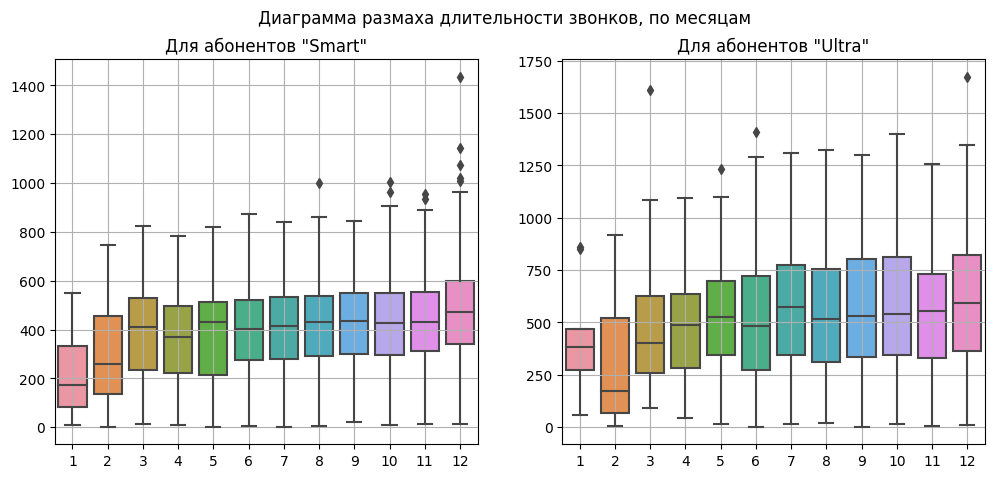

In [776]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle('Диаграмма размаха длительности звонков, по месяцам')

sns.boxplot(data=smart_calls, ax=ax1)
ax1.set_title('Для абонентов "Smart"')

sns.boxplot(data=ultra_calls, ax=ax2)
ax2.set_title('Для абонентов "Ultra"')

for ax in [ax1,ax2]:
    ax.grid()

Если сравнивать общую длительность звонков пользователей по каждому из месяцев, то можно увидеть, что суммарно пользователи внутри каждого из тарифов от месяца к месяцу тратят в среднем примерно одинаковое количество минут. При этом у пользователей тарифа Ультра это время в среднем выше и находится примерно на уровне 500 минут в месяц, в то время, как у абонентов тарифа Смарт среднее время потраченных в месяц минут располагается в районе 400.  
Интересно, что в феврале у пользователей обоих тарифов наблюдается более низкая продолжительность медианная продолжительность разговоров.  
Также, можно заметить, что у пользователей тарифа Ультра раброс потраченных минут в течение месяца выше, нежели у абонентов тарифа Смарт.  
В целом, можно утверждать, что длительность разговоров внутри каждой из выборок распределена равномерно по месяцам.  

In [777]:
# Количество минут, которые абоненты Smart тратили в месяц
calls_duration_smart_all = pd.Series(smart_calls.iloc[:, :12].to_numpy().flatten(), name='calls_duration_smart_all')

calls_duration_smart_all.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: calls_duration_smart_all, dtype: float64

In [778]:
# Количество минут, которые абоненты Ultra тратили в месяц
calls_duration_ultra_all = pd.Series(ultra_calls.iloc[:, :12].to_numpy().flatten(),name='calls_duration_ultra_all')

calls_duration_ultra_all

0          NaN
1          NaN
2          NaN
3          NaN
4        159.0
         ...  
1711      92.0
1712     813.0
1713    1030.0
1714     954.0
1715    1031.0
Name: calls_duration_ultra_all, Length: 1716, dtype: float64

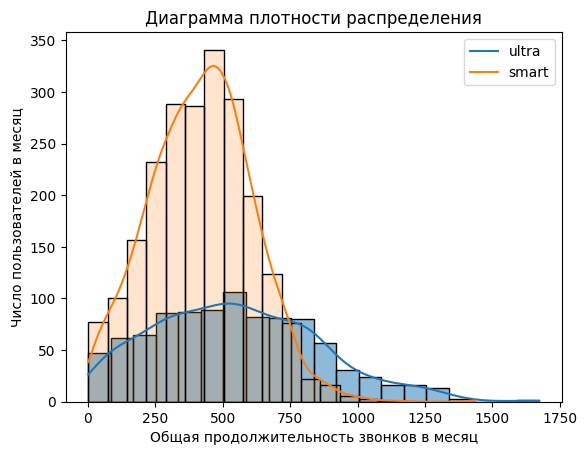

In [779]:
sns.histplot(calls_duration_ultra_all, bins=20, kde=True)
sns.histplot(calls_duration_smart_all, bins=20, kde=True, alpha=0.2)
plt.legend(labels=['ultra', 'smart'])
plt.title('Диаграмма плотности распределения')
plt.xlabel('Общая продолжительность звонков в месяц')
plt.ylabel('Число пользователей в месяц')
plt.show()

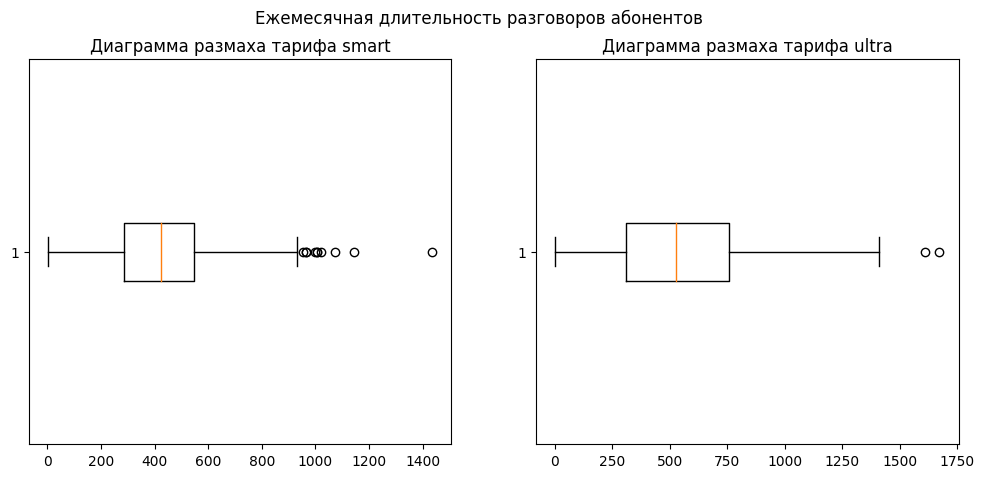

In [780]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle(f'Ежемесячная длительность разговоров абонентов')
    
ax1.boxplot(calls_duration_smart_all[calls_duration_smart_all.notna()], vert=False)
ax1.set_title('Диаграмма размаха тарифа smart')
    
ax2.boxplot(calls_duration_ultra_all[calls_duration_ultra_all.notna()], vert=False)
ax2.set_title('Диаграмма размаха тарифа ultra')
plt.show()


In [781]:
display(calls_duration_smart_all.describe())
display(calls_duration_ultra_all.describe())

count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: calls_duration_smart_all, dtype: float64

count     947.000000
mean      547.755016
std       305.513385
min         1.000000
25%       311.000000
50%       529.000000
75%       758.000000
max      1673.000000
Name: calls_duration_ultra_all, dtype: float64

У абонентов Smart:

* Диаграмма плотности напоминает нормальное распределение, однако, имеет выбросы справа.
* На диаграмме разброса также видны выбросы в стороне больших значений. Это означает, что находятся редкие пользователи, которые используют в месяц минут больше, нежели основная масса абонентов тарифа.
* 50% абонентов тратят от 285 до 546 минут в месяц. (в тариф включено 500 минут)  

У абонентов Ultra:

* Диаграмма плотности также напоминает нормальное распределение, однако имеется скос справа.
* Разброс значений, а также интерквантильный размах больше, нежели у абонентов тарифа Smart: 50% абонентов тратят от 311 до 758 минут в месяц

In [782]:
for tariff, data in {'smart': calls_duration_smart_all, 'ultra': calls_duration_ultra_all}.items():
    print(f'Средняя ежемесячная продолжительность разговоров, абонентов тарифа {tariff}: {data.mean():.0f} минут')
    print(f'Дисперсия составляет: {data.std()**2:.0f} минут')
    print(f'Стандартное отклонение составляет: {data.std():.0f} минут')
    print('-'*50)

Средняя ежемесячная продолжительность разговоров, абонентов тарифа smart: 419 минут
Дисперсия составляет: 35718 минут
Стандартное отклонение составляет: 189 минут
--------------------------------------------------
Средняя ежемесячная продолжительность разговоров, абонентов тарифа ultra: 548 минут
Дисперсия составляет: 93338 минут
Стандартное отклонение составляет: 306 минут
--------------------------------------------------


Проведем такой же анализ сообщений, как и со звонками

In [783]:
messages_smart_smart = messages_number_month.query('tariff =="smart"')
messages_smart_ultra = messages_number_month.query('tariff =="ultra"')

In [784]:
messages_smart_all = pd.Series(messages_smart_smart.iloc[:, :12].to_numpy().flatten(), name='messages_smart_all')
messages_ultra_all =pd.Series(messages_smart_ultra.iloc[:, :12].to_numpy().flatten(), name='messages_ultra_all')

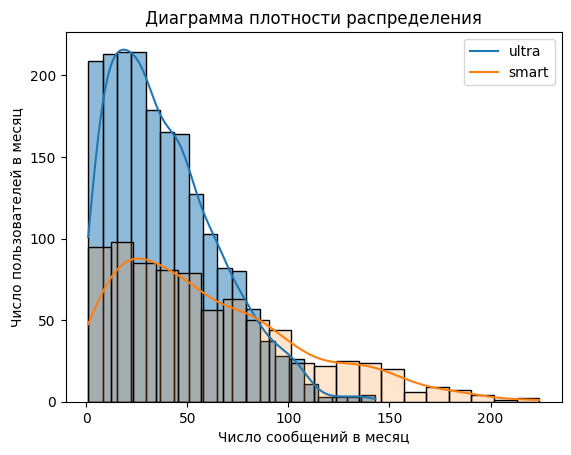

In [785]:
sns.histplot(messages_smart_all, bins=20, kde=True)
sns.histplot(messages_ultra_all, bins=20, kde=True, alpha=0.2)
plt.legend(labels=['ultra', 'smart'])
plt.title('Диаграмма плотности распределения')
plt.xlabel('Число сообщений в месяц')
plt.ylabel('Число пользователей в месяц')
plt.show()

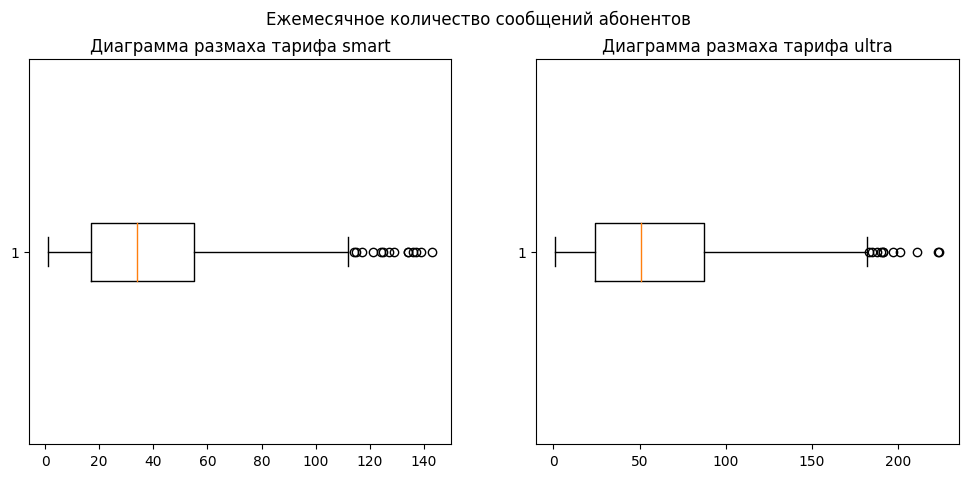

In [786]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle(f'Ежемесячное количество сообщений абонентов')
    
ax1.boxplot(messages_smart_all[messages_smart_all.notna()], vert=False)
ax1.set_title('Диаграмма размаха тарифа smart')
    
ax2.boxplot(messages_ultra_all[messages_ultra_all.notna()], vert=False)
ax2.set_title('Диаграмма размаха тарифа ultra')
plt.show()

In [787]:
for tariff, data in {'smart': messages_smart_all, 'ultra': messages_ultra_all}.items():
    print(f'Среднее ежемесячное количество сообщений, абонентов тарифа {tariff}: {data.mean():.0f} сообщений')
    print(f'Дисперсия составляет: {data.std()**2:.0f} сообщений')
    print(f'Стандартное отклонение составляет: {data.std():.0f} сообщений')
    print('-'*50)

Среднее ежемесячное количество сообщений, абонентов тарифа smart: 39 сообщений
Дисперсия составляет: 718 сообщений
Стандартное отклонение составляет: 27 сообщений
--------------------------------------------------
Среднее ежемесячное количество сообщений, абонентов тарифа ultra: 61 сообщений
Дисперсия составляет: 2110 сообщений
Стандартное отклонение составляет: 46 сообщений
--------------------------------------------------


In [788]:
display(messages_smart_all.describe())
display(messages_ultra_all.describe())

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_smart_all, dtype: float64

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_ultra_all, dtype: float64

Для абонентов Smart:  

* Пользователи в среднем отправляют 39 сообщений в месяц (стандартное отклонение - 27 смс). При этом, 75% абонентов отправляют в среднем менее 55 сообщений в месяц.
* При этом ежемесячное количество сообщений колеблется от 1-го до 143 сообщений в месяц

Для абонентов Ultra:  

* Пользователи в среднем отправляют 61 сообщение в месяц (стандартное отклонение - 46 смс). При этом, 75% абонентов отправляют в среднем менее 88 сообщений в месяц.
* При этом ежемесячное количество сообщений колеблется от 1-го до 224 сообщений в месяц  

Проведем анализ интернет-трафика

In [789]:
internet_smart_smart = internet_number_month.query('tariff =="smart"')
internet_smart_ultra = internet_number_month.query('tariff =="ultra"')

In [790]:
internet_smart_all = pd.Series(internet_smart_smart.iloc[:, :12].to_numpy().flatten(), name='internet_smart_all')
internet_ultra_all =pd.Series(internet_smart_ultra.iloc[:, :12].to_numpy().flatten(), name='internet_ultra_all')

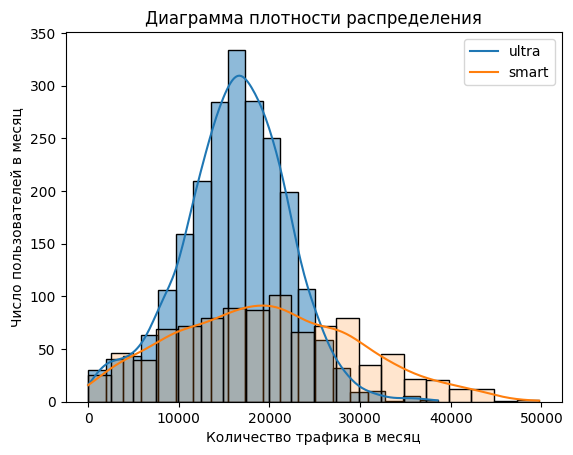

In [791]:
sns.histplot(internet_smart_all, bins=20, kde=True)
sns.histplot(internet_ultra_all, bins=20, kde=True, alpha=0.2)
plt.legend(labels=['ultra', 'smart'])
plt.title('Диаграмма плотности распределения')
plt.xlabel('Количество трафика в месяц')
plt.ylabel('Число пользователей в месяц')
plt.show()

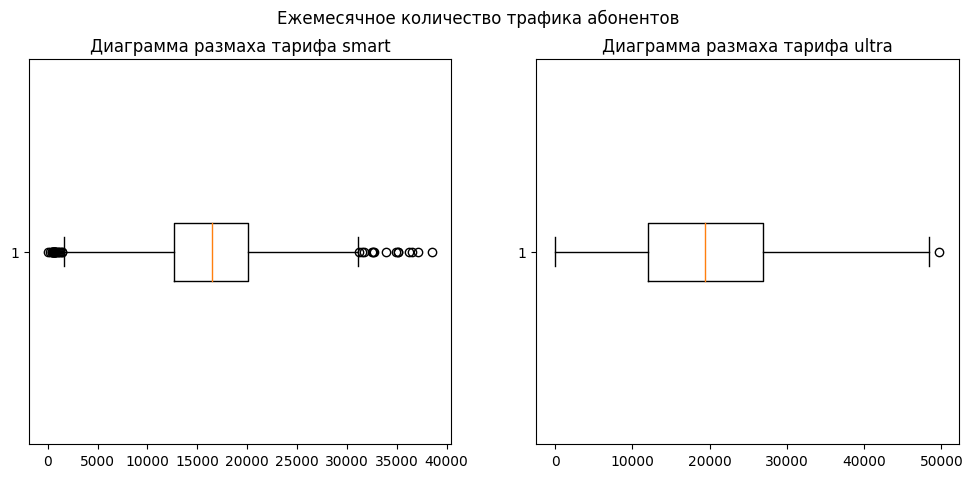

In [792]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.suptitle(f'Ежемесячное количество трафика абонентов')
    
ax1.boxplot(internet_smart_all[internet_smart_all.notna()], vert=False)
ax1.set_title('Диаграмма размаха тарифа smart')
    
ax2.boxplot(internet_ultra_all[internet_ultra_all.notna()], vert=False)
ax2.set_title('Диаграмма размаха тарифа ultra')
plt.show()

In [793]:
for tariff, data in {'smart': internet_smart_all, 'ultra': internet_ultra_all}.items():
    print(f'Среднее ежемесячное количество трафика, абонентов тарифа {tariff}: {data.mean():.0f} Мб')
    print(f'Дисперсия составляет: {data.std()**2:.0f} Мб')
    print(f'Стандартное отклонение составляет: {data.std():.0f} Мб')
    print('-'*50)

Среднее ежемесячное количество трафика, абонентов тарифа smart: 16216 Мб
Дисперсия составляет: 34359952 Мб
Стандартное отклонение составляет: 5862 Мб
--------------------------------------------------
Среднее ежемесячное количество трафика, абонентов тарифа ultra: 19668 Мб
Дисперсия составляет: 98864249 Мб
Стандартное отклонение составляет: 9943 Мб
--------------------------------------------------


In [794]:
display(internet_smart_all.describe())
display(internet_ultra_all.describe())

count     2228.000000
mean     16215.661849
std       5861.736234
min          0.000000
25%      12649.272500
50%      16507.740000
75%      20043.792500
max      38552.450000
Name: internet_smart_all, dtype: float64

count      975.000000
mean     19668.485262
std       9943.050284
min          0.000000
25%      12008.305000
50%      19394.290000
75%      26896.550000
max      49745.690000
Name: internet_ultra_all, dtype: float64

Для пользователей Smart:

* Диаграмма плотности напоминает форму нормального распредления, однако на графике размаха выдны выбросы как с меньшей так и с большей стороны. Иными словами, не смотря на то, что 50% значений использованного в месяц траффика расположены в достаточно узком диапазоне (13 - 20 Гб), есть пользователи, для которых характерно как использование гораздо меньшего так и гораздо большего объема траффика, чем для основной части пользователей.
* В среднем абоненты тратят 16 Гб в месяц, со стандартным отклонением в 6 Гб (при норме тарифа в 15 Гб)
* В среднем абоненты тарифа Smart превышают включенные в тарифый пакет Гигабайты примерно на 1 Гигабайт каждый месяц, а 50% пользователей и вовсе используют более 17 Гб в месяц.

Для пользователей Ultra:

* Диаграмма плотности также напоминает форму нормального распределения.
* Интерквантильный размах использованного траффика выше, нежели для абонентов Smart: 50% абонентов тратят от 12 до 27 гигабайт в месяц.
* В среднем абоненты тратят 20 Гб в месяц, со стандартным отклонением в 10 Гб (при норме тарифа в 30 Гб)
* Лишь 25% пользователей используют свыше 26 Гб в месяц.
* В среднем, абоненты тарифа Ultra тратят меньше траффика, чем включено в их пакет.

Заключение:  

На данном этапе мы изучили среднюю длительность звонков, количество сообщений и объем траффика, которые требуются абонентам в среднем ежемясячно.  
Полученные результаты выглядят следующим образом:

1. Для длительности звонков

    * Средняя ежемесячная продолжительность разговоров, абонентов тарифа Smart составляет 419 минуты со стандартным отклонением 189 минут
    * 50% абонентов Smart тратят от 285 до 546 минут в месяц. (в тариф включено 500 минут)
    * Средняя ежемесячная продолжительность разговоров, абонентов тарифа Ultra составляет 548 минуты со стандартным отклонением 306 минут
    * Разброс значений, а также интерквантильный размах минут у абонентов Ultra больше, нежели у абонентов тарифа Smart: 50% абонентов тратят от 311 до 758 минут в месяц (в тариф включено 3000 мин)
    * Таким образом, абоненты Ultra по большей части не используют все минуты, включенные в их тариф, в то время как 25% абонентов тарифа Smart используют свыше 546 мин в месяц, при лимите в 500 мин.

2. Для количества сообщений

    * Пользователи тарифа Smart в среднем отправляют 39 сообщения в месяц, со стандартным отклонением - 27 смс. 75% абонентов отправляют в среднем менее 55 сообщений в месяц. (при включенных в тариф 50 сообщений)
    * Среднее ежемесячное количество сообщений абонентов Smart находится в диапазоне от 1-го до 143 сообщений в месяц
    * Пользователи тарифа Ultra в среднем отправляют 61 сообщения в месяц, со стандартным отклонением - 46 смс. 75% абонентов отправляют в среднем менее 88 сообщений в месяц. (при включенных в тариф 1000 сообщений)
    * Среднее ежемесячное количество сообщений абонентов Ultra находится в диапазоне от 1-го до 224 сообщений в месяц

3. Для объема потребляемого трафика

    * Абоненты Smart среднем тратят 16 Гб в месяц, со стандартным отклонением в 6 Гб
    * 50% пользователей используют свыше 17 Гб в месяц. (при норме тарифа в 15 Гб)
    * В среднем абоненты тарифа Ultra тратят 20 Гб в месяц, со стандартным отклонением в 10 Гб
    * Лишь 25% пользователей Ultra используют свыше 25.6 Гб в месяц. (при норме тарифа в 30 Гб)
    * Получается, что в среднем абоненты тарифа Smart превышают включенные в тарифный пакет трафик примерно на 1 Гигабайт каждый месяц (а половина пользователей и вовсе используют более 17 Гб при лимите в 15Гб), в то время как абоненты тарифа Ultra наоборот тратят меньше траффика, чем включено в их пакет.

### Проверка гипотез

* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Гипотеза 1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [795]:
total_revenue_smart.head()

,1,2,3,4,5,6,7,8,9,10,11,12
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
1005,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
1006,NaN,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
1007,NaN,NaN,NaN,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0


In [796]:
total_revenue_ultra.head()

,1,2,3,4,5,6,7,8,9,10,11,12
1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0


Подготовим данные. Сохраним значения выручки в столбцы total_revenue_smart_all и total_revenue_ultra_all

In [797]:
total_revenue_smart_all = pd.Series(total_revenue_smart.to_numpy().flatten())
total_revenue_ultra_all = pd.Series(total_revenue_ultra.to_numpy().flatten())
total_revenue_smart_all

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
4195       NaN
4196     550.0
4197    1150.0
4198    1513.0
4199     598.0
Length: 4200, dtype: float64

Посмотрим на средние значения выручки для пользователей каждого тарифа.



In [798]:
print('Средняя ежемесячная выручка абонентов Smart и Ultra:', 
      round(total_revenue_smart_all.mean()), '|', round(total_revenue_ultra_all.mean()))

print('Медианная ежемесячная выручка абонентов Smart и Ultra:', 
      round(total_revenue_smart_all.median()), '|', round(total_revenue_ultra_all.median()))

print('Объем выборки абонентов Smart и Ultra:', 
      total_revenue_smart_all.count(), '|', total_revenue_ultra_all.count())

Средняя ежемесячная выручка абонентов Smart и Ultra: 1290 | 2070
Медианная ежемесячная выручка абонентов Smart и Ultra: 1023 | 1950
Объем выборки абонентов Smart и Ultra: 2229 | 985


Абонентов Smart у нас представлено практически в 2 раза больше, чем абонентов Ultra.  
Средняя и медианная ежемесячная выручка абонентов Ultra выше чем у абонентов Smart практически в 2 раза. При этом, интересно также заметить, что абоненты тарифа Smart в среднем платят более чем в два раза больше, нежели стоимость ежемесячного обслуживания.

Посмотрим на гистограммы распределения данных для каждой из выборок.

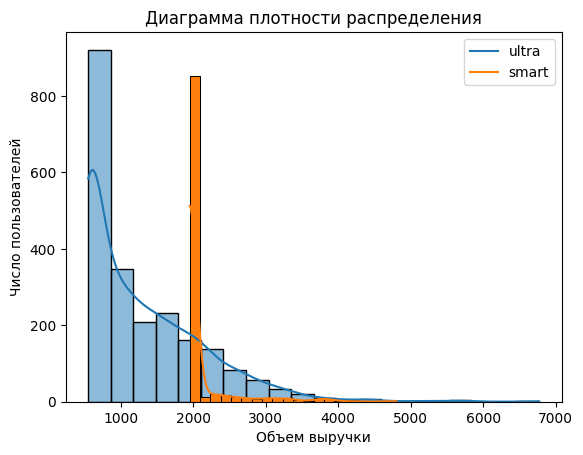

In [799]:
sns.histplot(total_revenue_smart_all, bins=20, kde=True, alpha=0.5)
sns.histplot(total_revenue_ultra_all, bins=20, kde=True, alpha=1)
plt.legend(labels=['ultra', 'smart'])
plt.title('Диаграмма плотности распределения')
plt.xlabel('Объем выручки')
plt.ylabel('Число пользователей')
plt.show()

Сформулируем гипотезы:

* Нулевая гипотеза (H0): показатели средней ежемесячной выручки для абонентов Smart и Ultra равны между собой.
* Альтернативная гипотеза (H1): показатели средней ежемесячной выручки для абонентов Smart и Ultra различаются.

Мы имеем 2 независимые выборки. Распределения выборок не являются нормальными. Распределения обоих выборок имеют скос справа.  
Мы не знаем, как распределены генеральные совокупности. Нам не известна дисперсия для генеральных совокупностей.  

Для проверки двусторонней гипотезы воспользуемся методом ttest_ind которые используют t-статистику для независимых выборок. В качестве уровня значимости примем значение alpha = 0.05  


In [802]:
total_revenue_smart_all = total_revenue_smart_all.dropna()
total_revenue_ultra_all = total_revenue_ultra_all.dropna()
result = st.ttest_ind(total_revenue_smart_all, total_revenue_ultra_all)

alpha = 0.05

print('pvalue:', result.pvalue/2)
if (result.pvalue/2 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза верна")

pvalue: 7.114907180382033e-161
Отвергаем нулевую гипотезу


Проверим одностороннюю гипотезу. Альернативную гипотеза: средняя ежемесячная выручка абонентов Ultra выше нежели у абонентов Smart

In [803]:
result = st.ttest_ind(total_revenue_smart_all, total_revenue_ultra_all)

alpha = 0.05

print('pvalue:', result.pvalue/2)
if (result.pvalue/2 < alpha) and (total_revenue_ultra_all.mean() > total_revenue_smart_all.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза верна")

pvalue: 7.114907180382033e-161
Отвергаем нулевую гипотезу


При уровне значимости 5%, мы можем утверждать, что выручка, которую приносят нам пользователи тарифа Smart и Ultra различаются.  
Более того, при уровне значимости 5% мы можем утверждать, что средняя ежемесячная выручка пользователей тарифа Ultra выше, нежели у абонентов Smart.

### Гипотеза 2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Создадим таблицу, в которой сохраним для каждого пользователя город его проживания.

In [804]:
user_city = df_users[['user_id', 'city']].set_index('user_id')

Заменим все регионы на значение 'Регион

In [805]:
user_city = user_city.where(user_city['city'] == 'Москва', 'Регион')
user_city.head()

,city
user_id,
1000,Регион
1001,Москва
1002,Регион
1003,Москва
1004,Регион


In [806]:
total_revenue_smart_city = total_revenue_smart.join(user_city)
total_revenue_ultra_city = total_revenue_ultra.join(user_city)

In [807]:
total_revenue_moscow = pd.Series(np.append(total_revenue_smart_city[total_revenue_smart_city['city']=='Москва'].iloc[:,:12].to_numpy().flatten(),
                                           total_revenue_ultra_city[total_revenue_ultra_city['city']=='Москва'].iloc[:,:12].to_numpy().flatten()))

In [808]:
total_revenue_region = pd.Series(np.append(total_revenue_smart_city[total_revenue_smart_city['city']=='Регион'].iloc[:,:12].to_numpy().flatten(),
                                           total_revenue_ultra_city[total_revenue_ultra_city['city']=='Регион'].iloc[:,:12].to_numpy().flatten()))

In [809]:
print('Средняя ежемесячная выручка абонентов из Москвы и регионов:', 
      round(total_revenue_moscow.mean()), '|', round(total_revenue_region.mean()))

print('Медианная ежемесячная выручка абонентов из Москвы и регионов:', 
      round(total_revenue_moscow.median()), '|', round(total_revenue_region.median()))

print('Объем выборки абонентов из Москвы и регионов:', 
      total_revenue_moscow.count(), '|', total_revenue_region.count())

Средняя ежемесячная выручка абонентов из Москвы и регионов: 1547 | 1525
Медианная ежемесячная выручка абонентов из Москвы и регионов: 1750 | 1583
Объем выборки абонентов из Москвы и регионов: 611 | 2603


Абонентов из регионов представлено практически в 4 раза больше, чем абонентов из Москвы.  
Средняя ежемесячная выручка абонентов из Москвы незначительно ниже, чем средняя ежемесячная выручка абонентов из регионов.

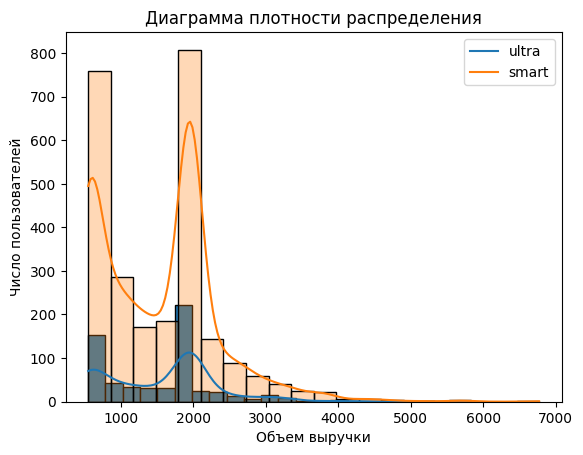

In [810]:
sns.histplot(total_revenue_moscow, bins=20, kde=True, alpha=1)
sns.histplot(total_revenue_region, bins=20, kde=True, alpha=0.3)
plt.legend(labels=['ultra', 'smart'])
plt.title('Диаграмма плотности распределения')
plt.xlabel('Объем выручки')
plt.ylabel('Число пользователей')
plt.show()

Если обратить внимание на функцию ядерного сглаживания для оценки плотности, можно увидеть 2 пика - в районе ~1000~ 900 и в районе 2000. Вероятнее всего причина состоит в том, что в обоих выборках присутсвуют 2 категории клиентов: пользователи тарифа Smart и Ultra.  
Данное распределение напоминает бимодальное и не является нормальным.  
Видно, что распределения очень похожи между собой. 

Сформулируем гипотезы:  

* Нулевая гипотеза (H0): показатели средней ежемесячной выручки для абонентов из Москвы и регионов равны между собой.
* Альтернативная гипотеза (H1): показатели средней ежемесячной выручки для абонентов из Москвы и регионов различаются.

In [812]:
total_revenue_moscow = total_revenue_moscow.dropna()
total_revenue_region = total_revenue_region.dropna()
result = st.ttest_ind(total_revenue_moscow, total_revenue_region)

alpha = 0.05

print('pvalue:', result.pvalue/2)

if result.pvalue/2 < alpha: 
    print('Отвергаем гипотезу H0')
else:
    print('Гипотеза HO не может быть отвергнута')

pvalue: 0.27200764558351115
Гипотеза HO не может быть отвергнута


При уровне значимости 5% мы не имеем достаточно оснований для того, чтобы отвергнуть утверждение о том, что средняя ежемесячная выручка абонентов из Москвы и абонентов из регионов равна между собой.

На данном этапе были проверены 2 гипотезы. Для проверки обеих гипотез был использован критерий Манна-Уитни. Были получены следующие результаты:  

* Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются:
Результат проверки: при уровне значимости 5%, мы можем утверждать, что выручка, которую приносят нам пользователи тарифа Smart и Ultra различаются. Средняя ежемесячная выручка от абонентов Ultra выше. Средняя ежемесячная выручка абонентов Smart и Ultra: 1290 и 2070 руб

* Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Результат проверки: при уровне значимости 5% у нас недостаточно оснований отвергнуть утверждение о том, что средняя ежемесячная выручка абонентов из Москвы и абонентов из регионов равна между собой.

### Подведение итогов

В ходе работы были предприняты следующие шаги: 

* Была осуществлена предобработка данных
* Была произведена подготовка данных к анализу
* Был произведен исследовательский анализ данных
* Была произведена проверка гипотез с использованием статистических методов

1. В ходе предобработки данных, мы:

* Привели данные к соответствущим типам
* Проверили данные на предмет ошибочных значений и дубликатов. Исправили там, где было необходимо.
* На основе имеющихся признаков, добавили новые, там, где это было необходимо для целей исследования.

2. На этапе подготовки данных к анализу, мы произвели рассчет необходимых метрик и сохранили их в соотвествующие таблицы. На основании этих таблиц были произведены дальнейшие шаги по иссследовательской работе. На данном этапе было подсчитано: 

* Количество звонков по каждому пользователю в месяц (длительностью свыше нуля) 
* Суммарная продолжительность звонков по каждому пользователю за месяц (каждый звонок перед подсчетом суммы был округлен в большую сторону, в соответствии с условиями оператора) (таблица 
* Количество сообщений, отправленных каждым пользователем за месяц 
* Количество трафика, которые абоненты использовали за месяц 
* Выручка, полученная от абонентов на тарифе smart (включая ежемесячный платеж и переплаты) 
* Выручка, полученная от абонентов на тарифе ultra (включая ежемесячный платеж и переплаты) 

3. На этапе исследовательского анализа данных, мы изучили среднюю длительность звонков, количество сообщений и объем траффика, которые требуются абонентам в среднем ежемясячно. Были получены следующие результаты:  

Что касается звонков:  

* Средняя ежемесячная продолжительность разговоров, абонентов тарифа Smart составляет 419 минуты со стандартным отклонением 189 минут. 50% абонентов Smart тратят от 285 до 546 минут в месяц. (в тариф включено 500 минут)
* Средняя ежемесячная продолжительность разговоров, абонентов тарифа Ultra составляет 548 минуты со стандартным отклонением 306 минут. Разброс значений, а также интерквантильный размах минут у абонентов Ultra больше, нежели у абонентов тарифа Smart: 50% абонентов тратят от 311 до 758 минут в месяц (в тариф включено 3000 мин)
* Таким образом, абоненты Ultra по большей части не используют все минуты, включенные в их тариф, в то время как 25% абонентов тарифа Smart используют свыше 546 мин в месяц, при лимите в 500 мин.

Что касается сообщений:

* Пользователи тарифа Smart в среднем отправляют 39 сообщения в месяц, со стандартным отклонением - 27 смс. 75% абонентов отправляют в среднем менее 55 сообщений в месяц. (при включенных в тариф 50 сообщений)
* Среднее ежемесячное количество сообщений абонентов Smart находится в диапазоне от 1-го до 143 сообщений в месяц
* Пользователи тарифа Ultra в среднем отправляют 61 сообщения в месяц, со стандартным отклонением - 46 смс. 75% абонентов отправляют в среднем менее 88 сообщений в месяц. (при включенных в тариф 1000 сообщений)
* Среднее ежемесячное количество сообщений абонентов Ultra находится в диапазоне от 1-го до 224 сообщений в месяц
* При этом, стандартное отклонение в данном случае явялется в большей степени показателем отклонения в большую сторону от среднего.
* Абоненты в среднем не используют полный лимит сообщений, который у них включен в тариф. Это характерно для пользователей обоих пакетов.  
 
Что касается объема потребляемого трафика:  

* Абоненты Smart среднем тратят 16 Гб в месяц, со стандартным отклонением в 6 Гб
50% пользователей используют свыше 17 Гб в месяц. при норме тарифа в 15 Гб)
* В среднем абоненты тарифа Ultra тратят 20 Гб в месяц, со стандартным отклонением в 10 Гб
* Лишь 25% пользователей Ultra используют свыше 25.6 Гб в месяц. (при норме тарифа в 30 Гб)
* В среднем абоненты тарифа Smart превышают включенные в тарифный пакет трафик на 1 Гигабайт каждый месяц (а половина пользователей и вовсе используют более 17 Гб при лимите в 15Гб), в то время как абоненты тарифа Ultra наоборот тратят меньше траффика, чем включено в их пакет.

4. На этапе проверки гипотез, были проверены 2 гипотезы. Для проверки обеих гипотез был использован непараметрический критерий Манна-Уитни. Были получены следующие результаты:  

* Гипотеза 1: 
    * Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
    * Средняя ежемесячная выручка абонентов Smart и Ultra: 1290 и 2070 руб. соотвественно.
    * Абоненты тарифа Smart в среднем ежемесячно платят примерно в 2 раза больше, нежели стоимость их тарифного плана.
    * При уровне значимости 5%, мы можем утверждать, что средняя выручка, которую приносят нам абоненты тарифа Smart и абоненты тарифа Ultra различается.
    * Более того, при том же уровне значимости, мы можем утверждать, что средняя ежемесячная выручка пользователей тарифа Ultra выше, нежели у абонентов Smart.

* Гипотеза 2: 
    * Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    * При уровне значимости 5% у нас недостаточно оснований отвергнуть гипотезу о том, что средняя ежемесячная выручка абонентов из Москвы и абонентов из регионов равна между собой.

Краткое резюме: 

Абоненты тарифа Ultra в среднем ежемесячно приносит больше выручки, нежели пользователи тарифа Smart. Эта разница статистически значима.
Разница же между выручкой абонентов из Москвы и абонентов из регионов статистически не значима.